In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "AAPL"
apple_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-19,0.502143,0.513393,0.496964,0.506250,0.428591,712353600
2004-04-20,0.503750,0.507321,0.492143,0.495179,0.419218,354519200
2004-04-21,0.492857,0.502143,0.488750,0.495179,0.419218,325875200
2004-04-22,0.492143,0.503214,0.484107,0.496071,0.419973,344584800
2004-04-23,0.494643,0.500000,0.483036,0.494643,0.418765,315828800


In [6]:
apple_data.shape

(5036, 6)

In [7]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,45.569488,46.057195,45.099212,45.598700,43.992582,4.019911e+08
std,55.392171,55.989105,54.836001,55.440561,55.414562,3.976603e+08
min,0.463750,0.470179,0.455179,0.460357,0.389738,2.404830e+07
25%,6.211696,6.280625,6.100268,6.194286,5.244079,1.087650e+08
50%,22.855893,23.092501,22.705357,22.805893,20.041544,2.623102e+08
75%,51.264374,51.800000,50.887500,51.390625,49.429959,5.721555e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,3.372970e+09


In [8]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2004-04-19 to 2024-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5036 non-null   float64
 1   High       5036 non-null   float64
 2   Low        5036 non-null   float64
 3   Close      5036 non-null   float64
 4   Adj Close  5036 non-null   float64
 5   Volume     5036 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [9]:
apple_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Apple data')

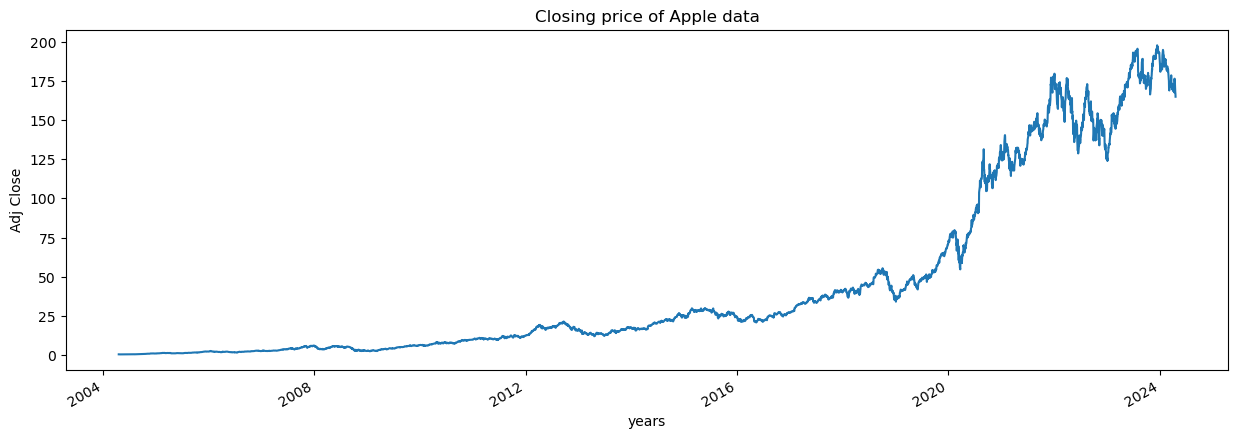

In [11]:
# The reason to use an adjusted closing price is because it is more accurate than the closing price
plt.figure(figsize = (15,5))
apple_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")

plt.title("Closing price of Apple data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Apple data")

In [13]:
apple_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

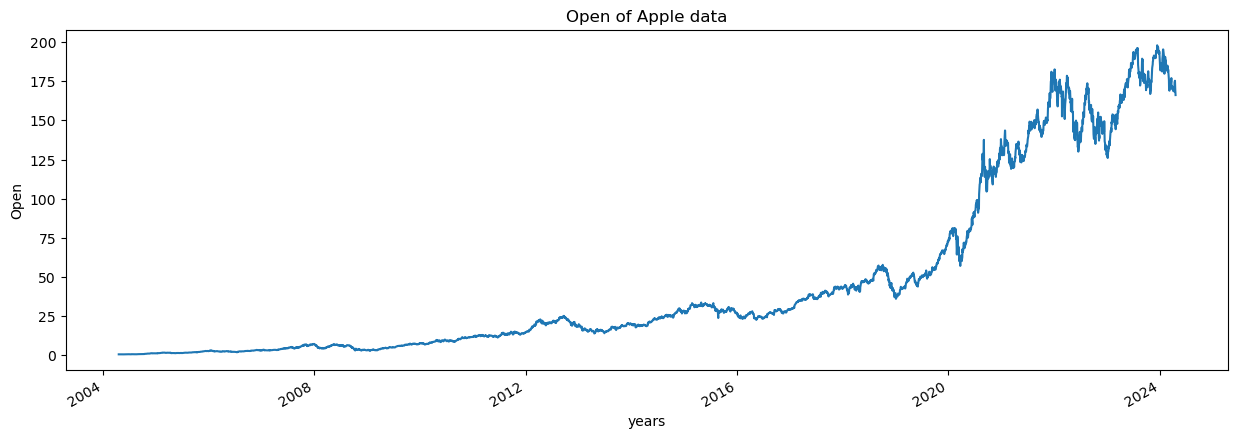

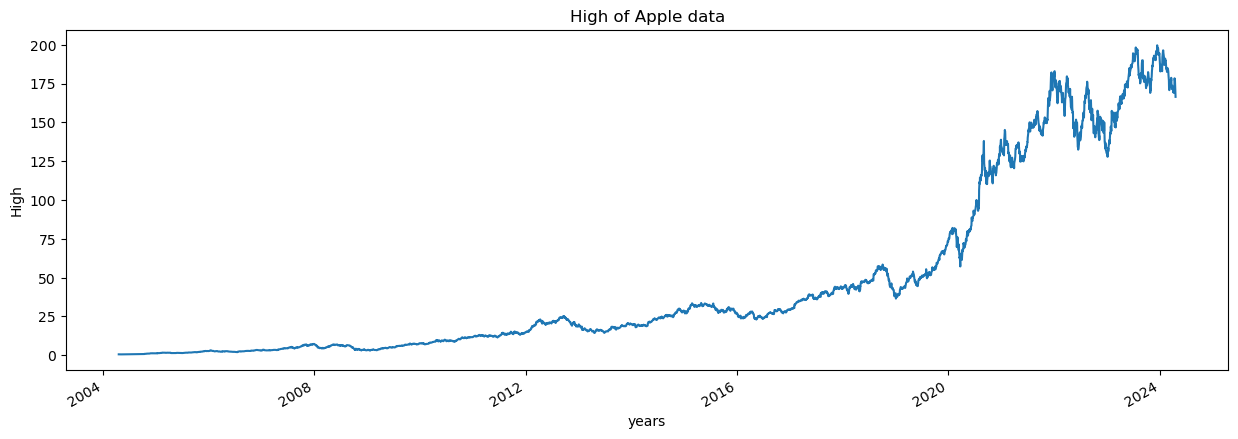

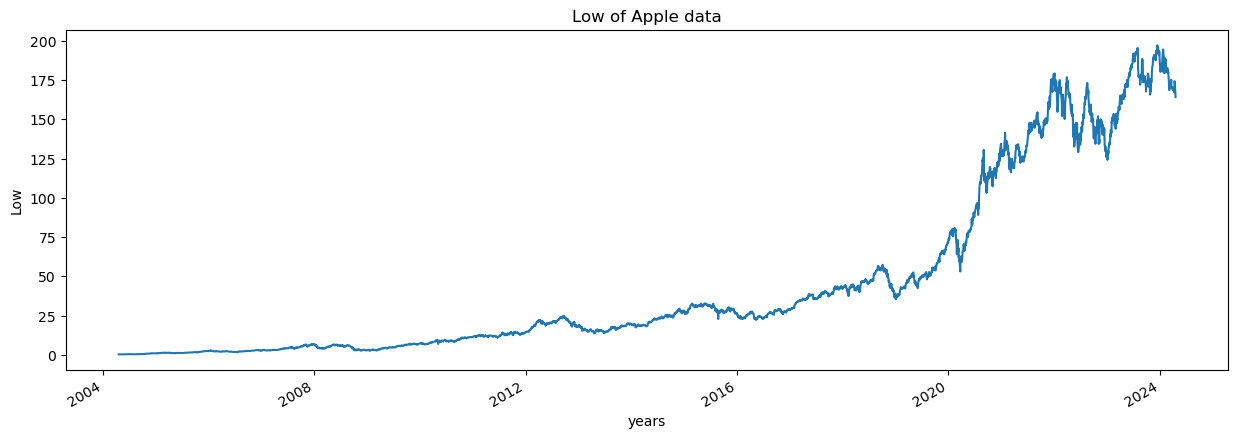

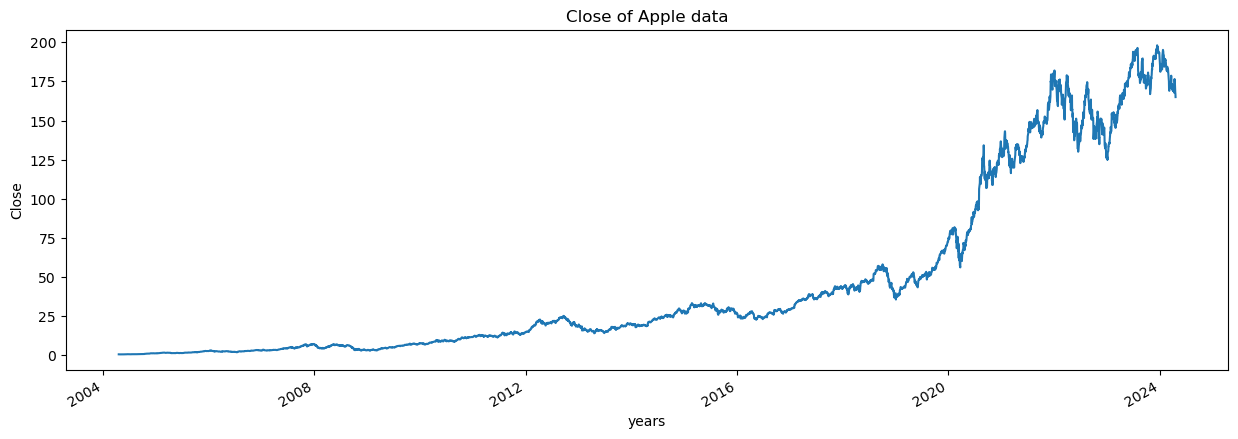

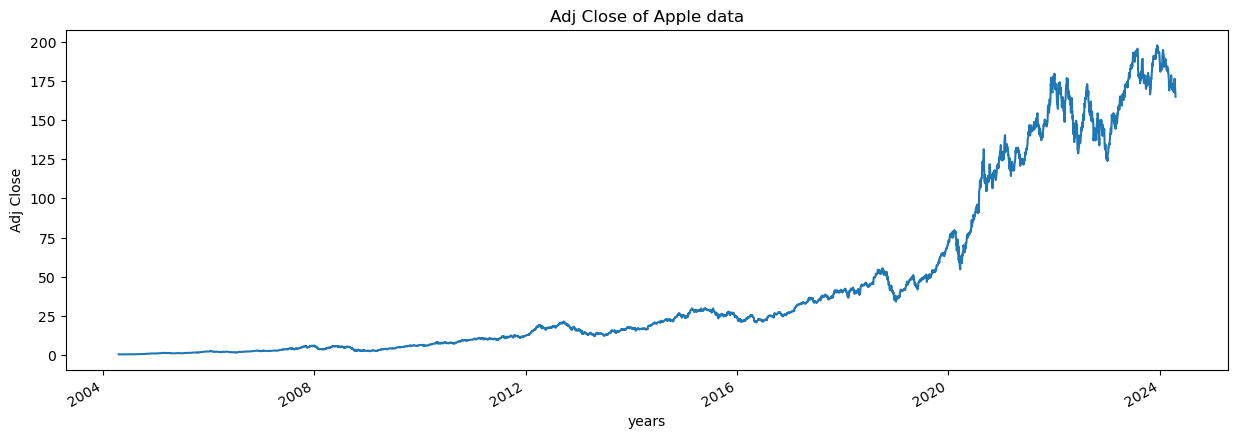

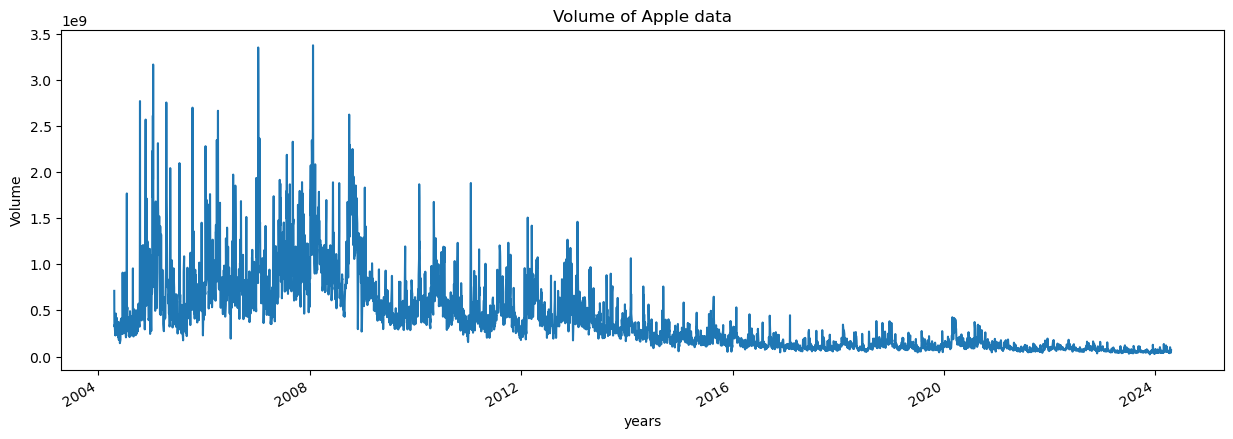

In [14]:
for column in apple_data.columns:
    plot_graph((15,5),apple_data[column], column)

In [15]:
# Calculate the moving average
# # MA for 5 days ==> null null null null 30 40 50 60 70 80
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[0:5])/5)

30.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
# Calculate the moving average for 5 days
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
# Count how many days are recorded for each year's price
for i in range(2004,2025):
    print(i,list(apple_data.index.year).count(i))

2004 179
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 76


In [19]:
apple_data['MA_for_250_days'] = apple_data['Adj Close'].rolling(250).mean()

In [20]:
apple_data['MA_for_250_days'][0:250].tail()

Date
2005-04-08         NaN
2005-04-11         NaN
2005-04-12         NaN
2005-04-13         NaN
2005-04-14    0.774721
Name: MA_for_250_days, dtype: float64

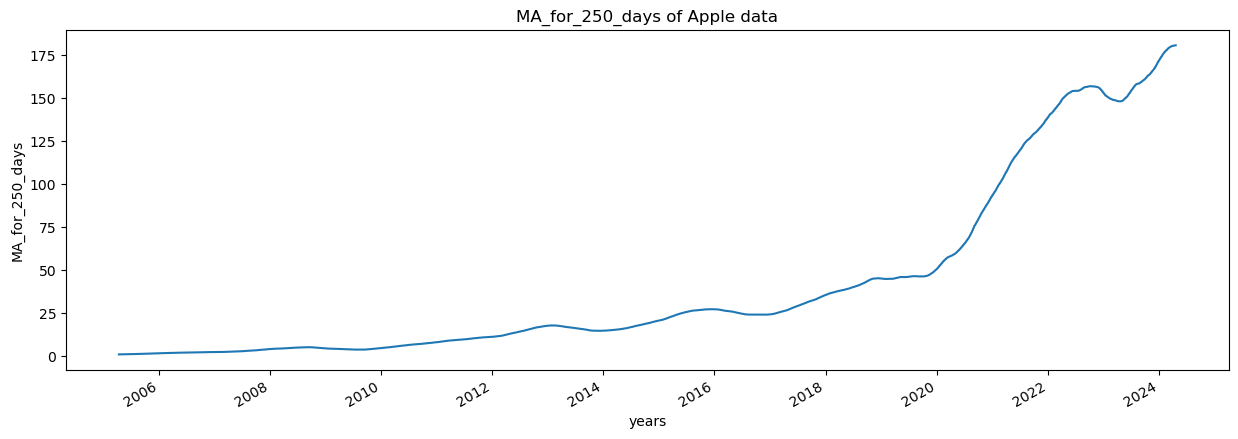

In [21]:
plot_graph((15,5), apple_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

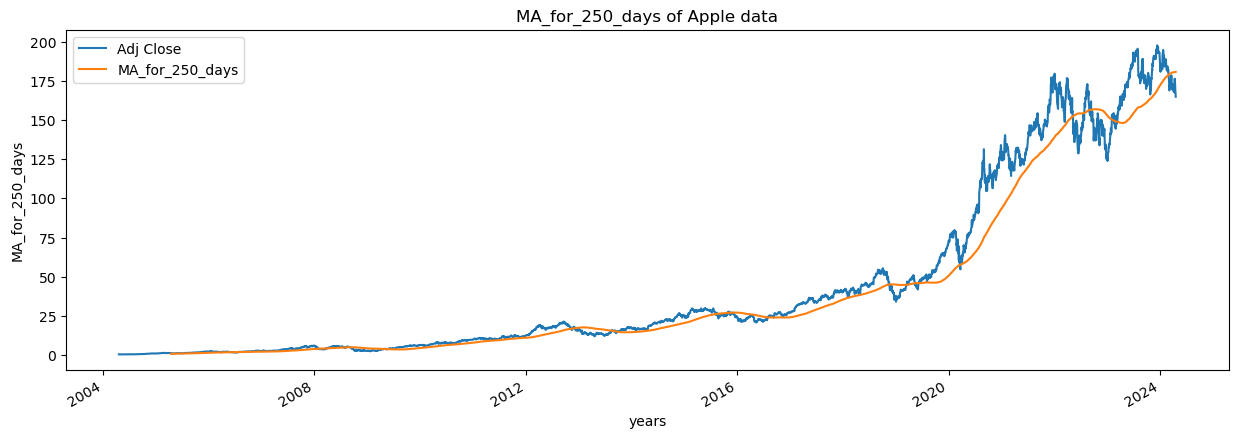

In [22]:
plot_graph((15,5), apple_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

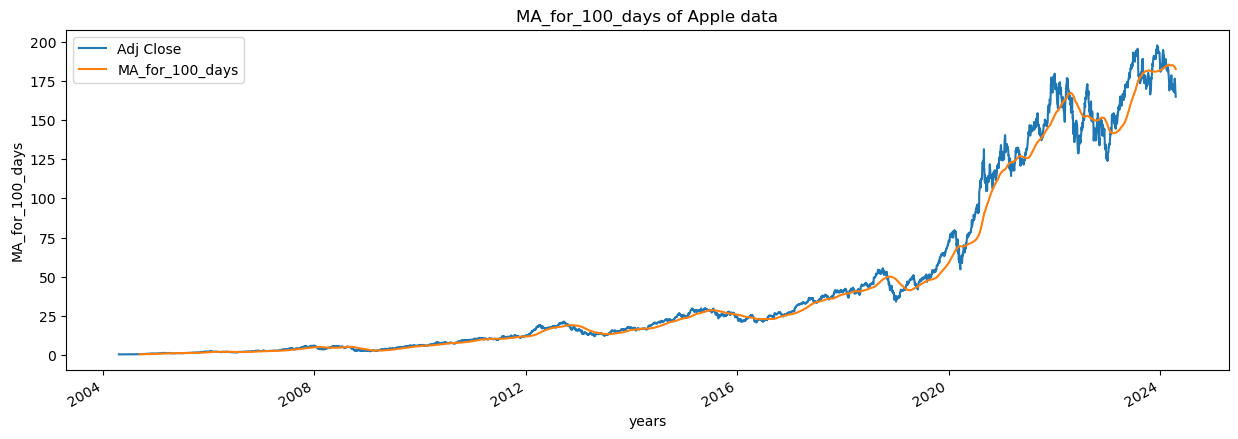

In [23]:
apple_data['MA_for_100_days'] = apple_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

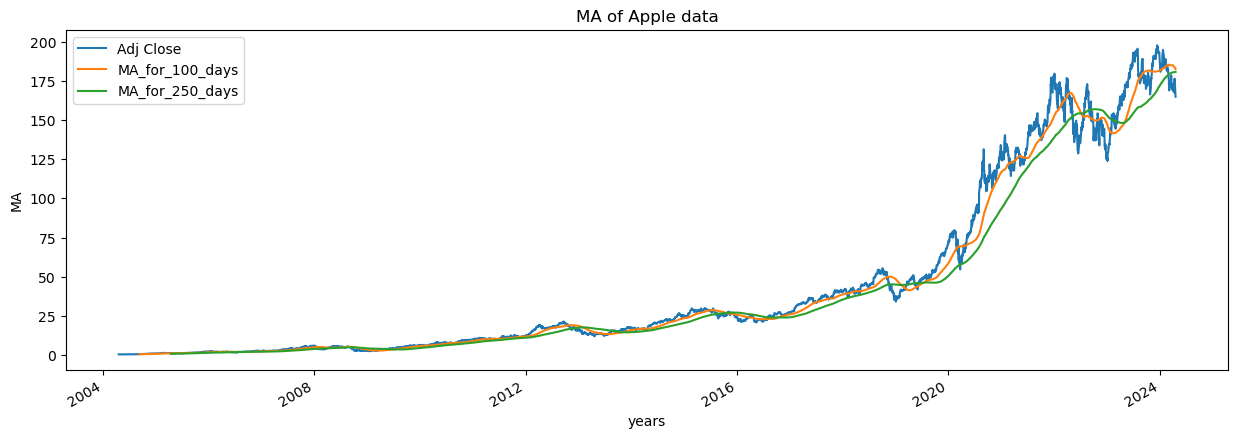

In [24]:
# To compare which analysis(how many days) is more accurate 
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
apple_data['percentage_change_cp'] = apple_data['Adj Close'].pct_change()
apple_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-04-19,0.428591,NaN
2004-04-20,0.419218,-0.021869
2004-04-21,0.419218,0.000000
2004-04-22,0.419973,0.001801
2004-04-23,0.418765,-0.002879


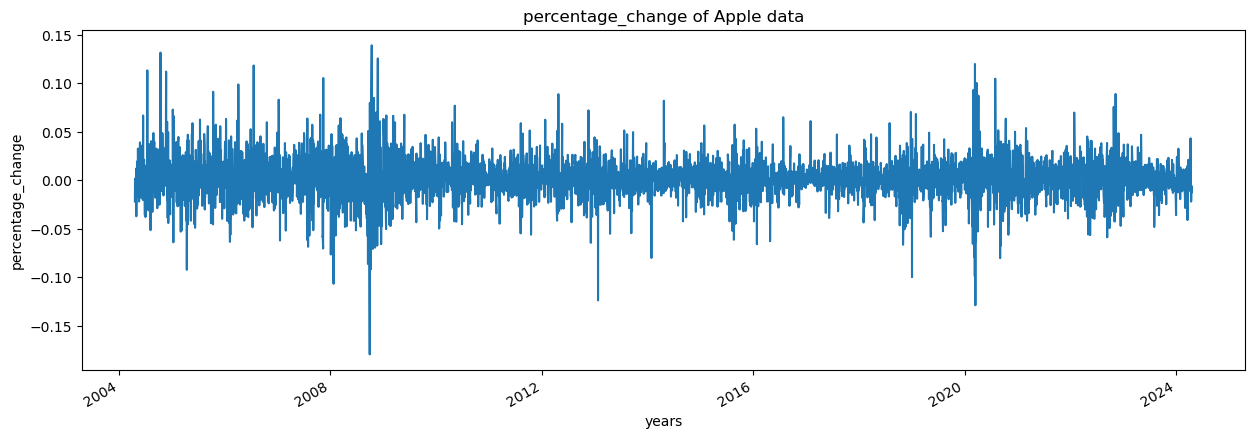

In [26]:
plot_graph((15,5), apple_data['percentage_change_cp'], 'percentage_change')

In [27]:
# Reprocess the data to make it easier to get the model trained 
Adj_close_price = apple_data[['Adj Close']]

In [28]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([197.85752869]), array([0.38973799]))

In [29]:
# Convert into the range of 0 to 1 instead of 0.3 to 197
# The model will run faster since it's a smaller number
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.96756388e-04],
       [1.49291580e-04],
       [1.49291580e-04],
       ...,
       [8.48797981e-01],
       [8.43936394e-01],
       [8.33605630e-01]])

In [30]:
len(scaled_data)

5036

In [31]:
# Same concept as moving average 
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[1.96756388e-04],
        [1.49291580e-04],
        [1.49291580e-04],
        [1.53115955e-04],
        [1.46993635e-04],
        [1.03353353e-04],
        [8.88068434e-05],
        [5.12928050e-05],
        [7.57941590e-05],
        [0.00000000e+00],
        [2.22034087e-05],
        [2.75626648e-05],
        [6.66072077e-05],
        [6.12479516e-05],
        [6.81380141e-05],
        [3.82807243e-05],
        [1.04121095e-04],
        [1.16369206e-04],
        [1.07949545e-04],
        [9.79943983e-05],
        [6.58394652e-05],
        [9.79943983e-05],
        [5.28276863e-05],
        [7.11987213e-05],
        [1.01823150e-04],
        [1.19430970e-04],
        [2.01348053e-04],
        [2.09004499e-04],
        [1.82976414e-04],
        [1.74551923e-04],
        [1.74551923e-04],
        [2.40396067e-04],
        [2.00584989e-04],
        [2.29678309e-04],
        [3.08529704e-04],
        [3.49871739e-04],
        [3.38390918e-04],
        [3.79733406e-04],
        [3.3

In [33]:
# Split data into training and testing set
# 70% as training data and 30% as testing data
int(len(x_data)*0.7)

3455

In [34]:
# The first 100 values are removed since they are null values
5034-100-int(len(x_data)*0.7)

1479

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3455, 100, 1)
(3455, 1)
(1481, 100, 1)
(1481, 1)


In [114]:
# Building the neural network model to predict the closing price
# The reason to use LSTM is because it is able to store past information that is important and forget the 
# information that is not important
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras

In [115]:
# Adding first and second layer
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [156]:
model.fit(x_train, y_train, batch_size=64, epochs = 20)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 3.9924e-06
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 4.3519e-06
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 3.3390e-06
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 4.2398e-06
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 4.9783e-06
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 3.9836e-06
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 5.4749e-06
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 3.2091e-06
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 6.1645e-06
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 3.9056e-06
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 3.2372e-06
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 3.7356e-06
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 3.9422e-06
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 3.1581e-06
E

In [157]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [158]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [159]:
predictions

array([[0.22597924],
       [0.22771497],
       [0.23054032],
       ...,
       [0.8656395 ],
       [0.84782267],
       [0.83966327]], dtype=float32)

In [160]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 45.01336 ],
       [ 45.35611 ],
       [ 45.914024],
       ...,
       [171.32567 ],
       [167.8074  ],
       [166.1962  ]], dtype=float32)

In [161]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 45.27313614],
       [ 45.65152359],
       [ 46.0037384 ],
       ...,
       [168.        ],
       [167.03999329],
       [165.        ]])

In [162]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [163]:
rmse

2.504323013594901

In [164]:
# Reshape the two-dimensional array into a one-dimensional array since I'm transferring it to the data frame
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = apple_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-06-01,45.273136,45.013359
2018-06-04,45.651524,45.356110
2018-06-05,46.003738,45.914024
2018-06-06,46.163174,46.421043
2018-06-07,46.039429,46.680153


<Figure size 640x480 with 0 Axes>

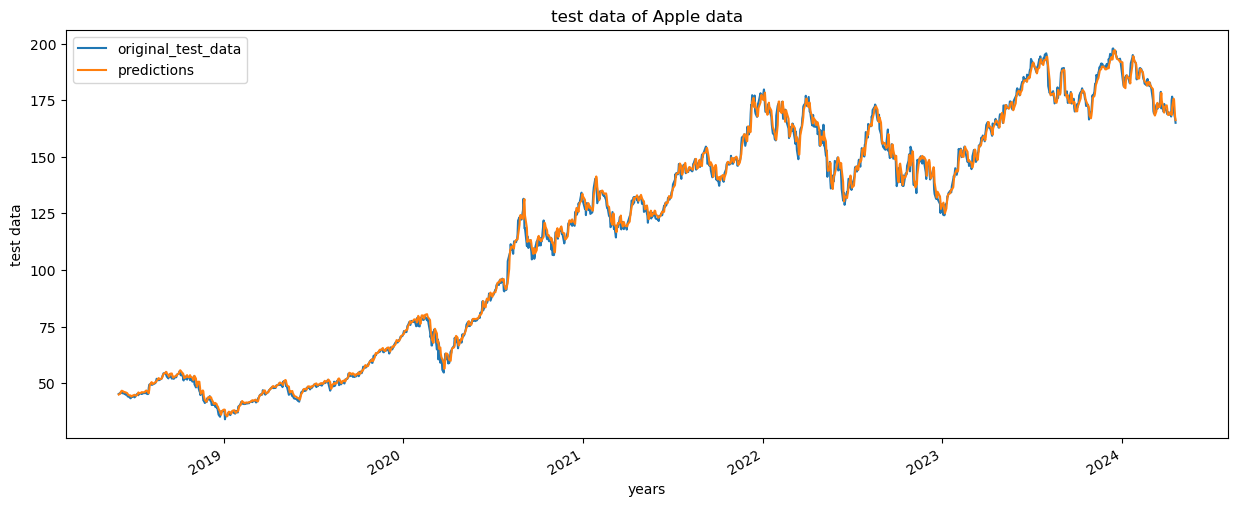

In [165]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

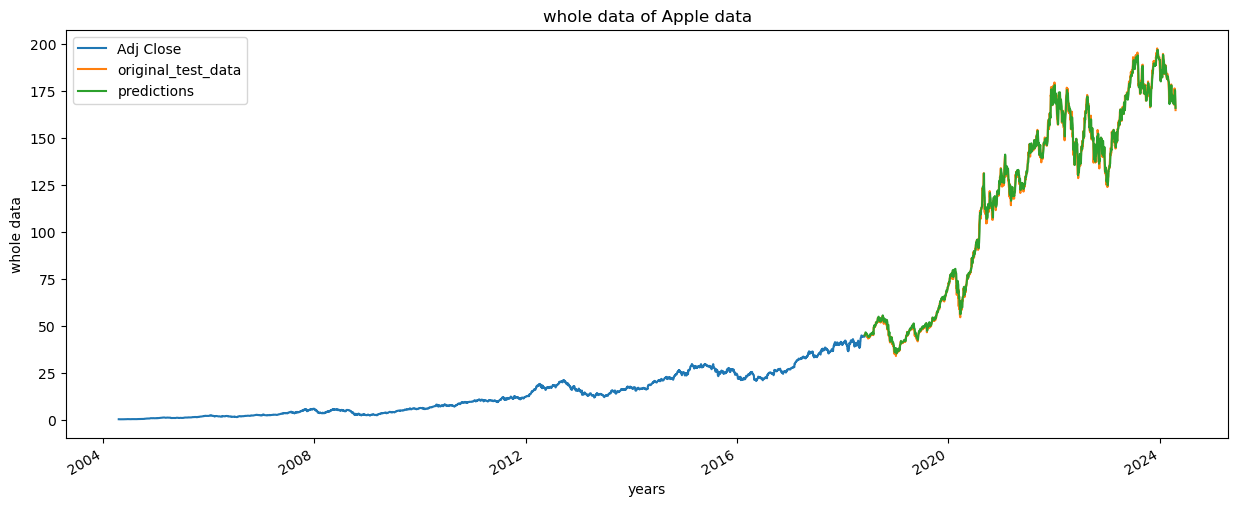

In [166]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [191]:
last_100 = Adj_close_price[['Adj Close']].tail(100)
last_100.tail()

,Adj Close
Date,
2024-04-15,172.690002
2024-04-16,169.380005
2024-04-17,168.000000
2024-04-18,167.039993
2024-04-19,165.000000


In [192]:
# 1D to 2D to 3D
last_100 = scaler.fit_transform(last_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.74710811],
        [0.76564945],
        [0.73434196],
        [0.75197123],
        [0.79118221],
        [0.73616563],
        [0.85744451],
        [0.82400965],
        [0.88328099],
        [0.92705044],
        [0.85014937],
        [0.89665503],
        [0.99544059],
        [1.        ],
        [0.98358651],
        [0.93252145],
        [0.96443729],
        [0.90030237],
        [0.8957425 ],
        [0.86291599],
        [0.84619832],
        [0.84923731],
        [0.86230763],
        [0.83039226],
        [0.62096611],
        [0.57871661],
        [0.50759073],
        [0.48540159],
        [0.61853455],
        [0.6057684 ],
        [0.63768378],
        [0.61944662],
        [0.62947703],
        [0.5598711 ],
        [0.53099518],
        [0.71184958],
        [0.80090844],
        [0.87173015],
        [0.91094067],
        [0.89027149],
        [0.88024108],
        [0.82704863],
        [0.80607574],
        [0.69391567],
        [0.58327556],
        [0

In [193]:
last_100.shape

(1, 100, 1)

In [194]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0.02036138]], dtype=float32)

In [195]:
scaler.inverse_transform(day101)

array([[165.66902]], dtype=float32)

In [81]:
# tmr day 101 ==> past 100
#     day 102 ==> day101 + past 99 days
#     day 103 ==> day 102 + + day 101 + past 98 days
def predict_future(no_of_days, prev_100):
    future_predictions = []
    
    # Ensure prev_100 is a numpy array with the correct shape (1, timesteps, features)
    prev_100 = np.array(prev_100)
    if prev_100.ndim == 2:
        # If it's 2D, assume one feature per timestep, reshape accordingly
        prev_100 = prev_100.reshape(1, prev_100.shape[0], prev_100.shape[1])
    elif prev_100.ndim == 1:
        # If it's 1D, assume one sample, one feature per timestep
        prev_100 = prev_100.reshape(1, prev_100.shape[0], 1)

    for i in range(no_of_days):
        # Ensure the input is properly shaped for the model
        next_day = model.predict(prev_100)
        
        # Convert prediction to list if needed, update future_predictions
        if isinstance(next_day, np.ndarray):
            next_day = next_day.tolist()
        future_predictions.append(scaler.inverse_transform([next_day[0]]))
        
        # Update prev_100 to include the new prediction
        new_data_point = np.array(next_day[-1]).reshape(1, 1, -1)
        prev_100 = np.concatenate((prev_100[:, 1:, :], new_data_point), axis=1)
        
    return future_predictions

In [82]:
no_of_days = 10
# last_100 = last_100.tolist()
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[array([[168.11182515]]), array([[168.14590311]]), array([[168.18299196]]), array([[168.2203031]]), array([[168.25654516]]), array([[168.29125668]]), array([[168.3244056]]), array([[168.35614271]]), array([[168.38667267]]), array([[168.4161977]])]


Text(0.5, 1.0, 'Future Close price of Apple')

<Figure size 640x480 with 0 Axes>

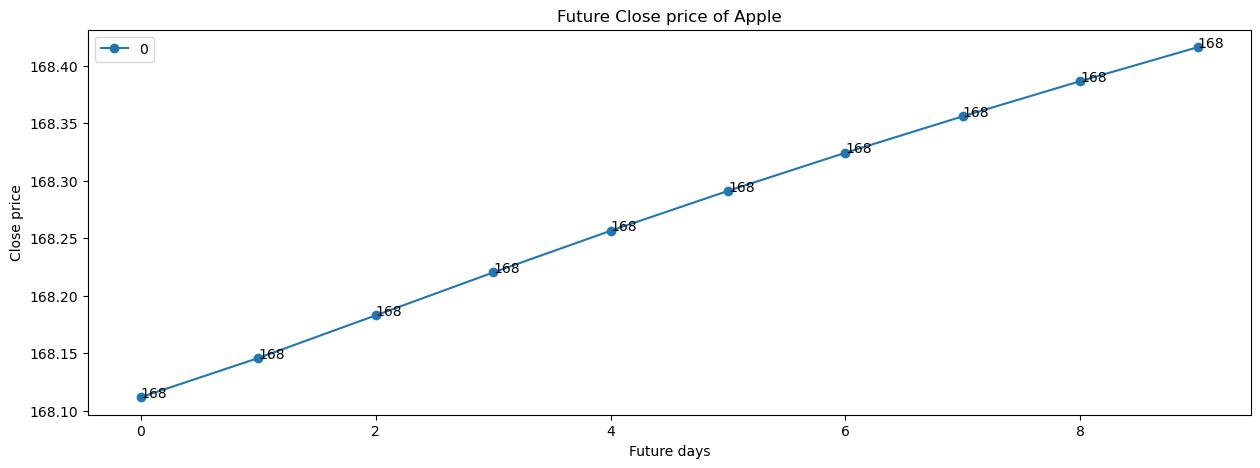

In [83]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Apple")

In [84]:
model.save("Latest_stock_price_model.keras")